# Workshop: Informática Aplicada
## Machine Learning y Data Science: un enfoque práctico
Rafaela - 5 y 6 de junio

Ariel Rossanigo - Mariano Ferrero

# Introducción a Scikit-Learn

https://scikit-learn.org/stable/

## Qué es?

Es una de las librería para trabajar con Machine Learning más utilizadas en todo el mundo:
- Gratis y libre
- Muy fácil de usar y con código muy optimizado
- Creada a partir de otras librerías muy utilizadas (NumPy, SciPy,  matplotlib)
- En continuo crecimiento y con mucho soporte

# Importando la librería

In [1]:
from sklearn import datasets

In [2]:
numeros = datasets.load_digits()

In [3]:
print(numeros['DESCR'])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each bloc

## Jugando con imágenes

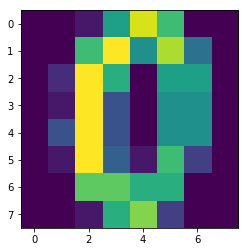

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(numeros['images'][10])

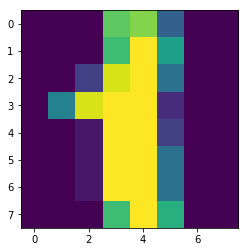

In [5]:
plt.imshow(numeros['images'][1])

### Mirando los datos en crudo ...

In [6]:
numeros['images'][1]

array([[ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16.,  9.,  0.,  0.],
       [ 0.,  0.,  3., 15., 16.,  6.,  0.,  0.],
       [ 0.,  7., 15., 16., 16.,  2.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  3.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16., 10.,  0.,  0.]])

## sklearn tiene más de 50 algoritmos para utilizar, pero todos con una misma interfaz
## Vamos a ver un ejemplo

In [7]:
# importamos el método regresión logística
from sklearn.linear_model import LogisticRegression

In [8]:
# creamos un nuevo modelo con esa técnica definiendo algunos parámetros
clf = LogisticRegression(solver='liblinear', multi_class='auto', max_iter=500)

In [9]:
# entrenamos el modelo con un conjunto de datos (entradas + etiquetas de salida)
clf.fit(numeros.data[:-1], numeros.target[:-1])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=500, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [10]:
# predecimos un caso para ver que predice el modelo
clf.predict(numeros.data[-1:])

array([8])

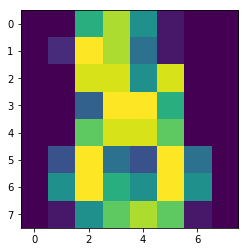

In [11]:
plt.imshow(numeros['images'][-1])

## Midiendo el rendimiento

In [12]:
predicciones_train = clf.predict(numeros.data[:-1])

In [13]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.utils.multiclass import unique_labels

In [14]:
accuracy_score(numeros.target[:-1], predicciones_train)

0.9938752783964365

In [17]:
from src import tools

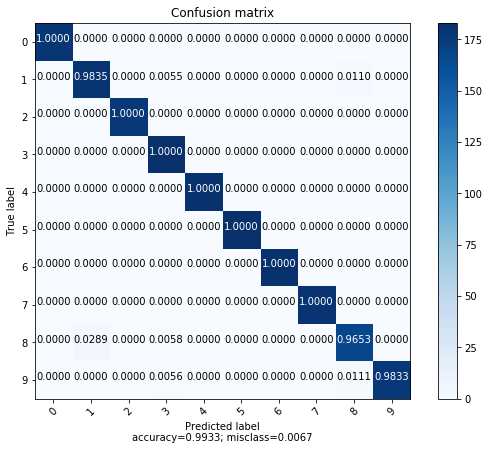

In [18]:
tools.plot_confusion_matrix(confusion_matrix(numeros.target[:-1], predicciones_train),
                            target_names=list(range(10)))